### 1 ISL Exercise 9.7.1 (10pts)

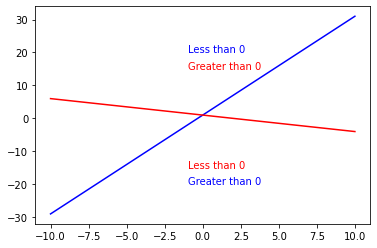

In [134]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.arange(-10, 11)
x2 = 1 + 3 * x1
plt.plot(x1, x2, color="blue")
plt.text(-1, -20, "Greater than 0", color="blue")
plt.text(-1, 20, "Less than 0", color="blue")
plt.plot(x1, 1 - x1/2, color="red")
plt.text(-1, -15, "Less than 0", color="red")
plt.text(-1, 15, "Greater than 0", color="red")
plt.show()

As is shown in the plot, 1 + 3X1 − X2 = 0 is the blue line. The lower side of the blue line is greater than 0, and the upper side of the blue line is less than 0. −2 + X1 + 2X2 = 0 is the red line. The lower side of the red line is less than 0, and the upper side of the red line is greater than 0.

### 2 ISL Exercise 9.7.2 (10pts)

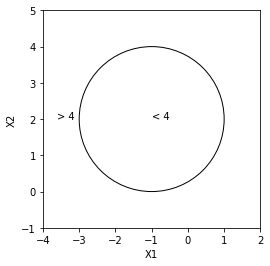

In [135]:
#(a)(b)
fig, ax = plt.subplots()
ax.set_xlim([-4, 2])
ax.set_ylim([-1, 5])
ax.set_aspect('equal')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.plot([], [])

ax.add_artist(plt.Circle((-1, 2), 2, fill=False))
ax.text(-1, 2, "< 4")
ax.text(-3.6, 2, "> 4")

plt.show()

(b) The points inside the circle is <4, and the points outside the circle is >4. The points on the circle is =4.

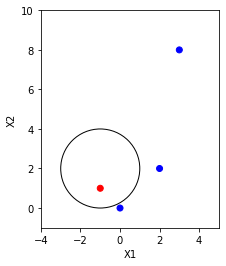

In [136]:
#(c)
radius = 2

x = np.array([0, -1, 2, 3])
y = np.array([0, 1, 2, 8])
colors = ["blue", "red", "blue", "blue"]

fig, ax = plt.subplots()
ax.set_xlim([-4, 5])
ax.set_ylim([-1, 10])
ax.set_aspect('equal')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.scatter(x, y, c=colors)
ax.add_artist(plt.Circle((-1, 2), radius, fill=False))
plt.show()

For (0,0), we have 5>4 (blue class), for (−1,1), we have 1<4 (red class), for (2,2), we have 9>4 (blue class), for (3,8), we have 52>4 (blue class).

(d) When we expand the equation, we will get X1^2+X2^2+2X1−4X2+1=0, which is linear in terms of X1, X1^2, X2 and x2^2.

### 3 Support vector machines (SVMs) on the Carseats data set (30pts)

In [220]:
import pandas as pd
import io
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Carseats.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [221]:
data.loc[data[data.Sales <= 8].index.tolist(),'sales2'] = 0
data.loc[data[data.Sales > 8].index.tolist(),'sales2'] = 1
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales2
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1.0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1.0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1.0
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0.0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1.0
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0.0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0.0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0.0


In [222]:
from sklearn.model_selection import train_test_split

data_other, data_test = train_test_split(
  data, 
  train_size = 0.75,
  random_state = 425, # seed
    stratify = data.sales2
  )
data_test.shape

(100, 12)

In [223]:
num_features = ['CompPrice','Income','Advertising','Population','Price','Age','Education']
cat_features = ['Urban','US','ShelveLoc']
features = np.concatenate([num_features, cat_features])
# Non-test X and y
X_other = data_other[features]
y_other = data_other.sales2
# Test X and y
X_test = data_test[features]
y_test = data_test.sales2

In [224]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Transformer for categorical variables
categorical_tf = Pipeline(steps = [
  #("cat_impute", SimpleImputer(strategy = 'most_frequent')),
  ("encoder", OneHotEncoder(drop='first')),
    ('std',StandardScaler(with_mean=False))
])

# Transformer for continuous variables
numeric_tf = Pipeline(steps = [
  #("num_impute", SimpleImputer(strategy = 'mean')),
    ('std',StandardScaler())
])

# Column transformer
col_tf = ColumnTransformer(transformers = [
  ('num', numeric_tf, num_features),
  ('cat', categorical_tf, cat_features)
])

In [225]:
#SVM with linear kernel
from sklearn.svm import SVC

svm_mod1 = SVC(
  C = 1.0,
  kernel = 'linear',
  gamma = 'scale', # 1 / (n_features * X.var())
  probability = True,
  random_state = 425
  )

In [226]:
from sklearn.pipeline import Pipeline

pipe1 = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", svm_mod1)
  ])

C_grid1 = [1.0]
tuned_parameters1 = {
  "model__C": C_grid1,
  }

from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds1 = 5
search1 = GridSearchCV(
  pipe1,
  tuned_parameters1,
  cv = n_folds1, 
  scoring = "roc_auc",
  # Refit the best model on the whole data set
  refit = True
  )

# Fit CV
search1.fit(X_other, y_other)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['CompPrice',
                                                                          'Income',
                                                                          'Advertising',
                                                                          'Population',
                                                                          'Price',
                                                                          'Age',
                                                                          'Education']),
                                          

In [227]:
search1.best_score_

0.9550021164021164

In [228]:
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy_score(
  y_other,
  search1.best_estimator_.predict(X_other)
  )

0.9066666666666666

In [229]:
roc_auc_score(
  y_test,
  search1.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.9536998759818106

In [230]:
accuracy_score(
  y_test,
  search1.best_estimator_.predict(X_test)
  )


0.86

The final AUC on the test set is 0.95. The final classification accuracy on the test set is 0.86.

In [231]:
#SVM with polynomial kernel (tune the degree and regularization parameter C)
svm_mod = SVC(
  C = 1.0,
  kernel = 'poly',
  degree = 3,
  gamma = 'scale', # 1 / (n_features * X.var())
  probability = True,
  random_state = 425
  )

In [232]:
pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", svm_mod)
  ])

# Tune hyper-parameter(s)
C_grid = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
d_grid = [2, 3, 4, 5]
tuned_parameters = {
  "model__C": C_grid,
  "model__degree": d_grid
  }

# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  # Refit the best model on the whole data set
  refit = True
  )

# Fit CV
search.fit(X_other, y_other)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['CompPrice',
                                                                          'Income',
                                                                          'Advertising',
                                                                          'Population',
                                                                          'Price',
                                                                          'Age',
                                                                          'Education']),
                                          

<Figure size 432x288 with 0 Axes>

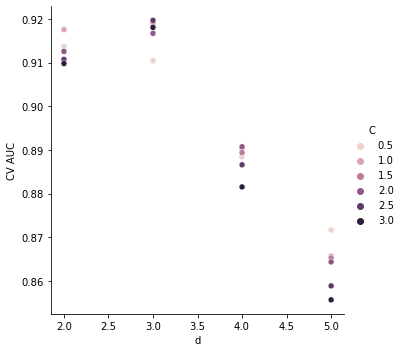

In [233]:
cv_res = pd.DataFrame({
  "C": np.array(search.cv_results_["param_model__C"]),
  "auc": search.cv_results_["mean_test_score"],
  "d": search.cv_results_["param_model__degree"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "d",
  y = "auc",
  hue = "C"
  ).set(
    xlabel = "d",
    ylabel = "CV AUC"
    );
plt.show()



In [234]:
search.best_score_

0.9196828042328041

In [235]:
roc_auc_score(
  y_test,
  search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.9231087226126499

In [236]:
accuracy_score(
  y_test,
  search.best_estimator_.predict(X_test)
  )

0.87

The final AUC on the test set is 0.92. The final classification accuracy on the test set is 0.87.

In [237]:
#SVM with radial kernel (tune the scale parameter and regularization parameter) 
svm_mod = SVC(
  C = 1.0,
  kernel = 'rbf',
  gamma = 'scale', # 1 / (n_features * X.var())
  probability = True,
  random_state = 425
  )

In [238]:
pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", svm_mod)
  ])

C_grid = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
gamma_grid = np.logspace(start = -3, stop = 0, base = 10, num = 10)
tuned_parameters = {
  "model__C": C_grid,
  "model__gamma": gamma_grid
  }

# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  # Refit the best model on the whole data set
  refit = True
  )

# Fit CV
search.fit(X_other, y_other)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['CompPrice',
                                                                          'Income',
                                                                          'Advertising',
                                                                          'Population',
                                                                          'Price',
                                                                          'Age',
                                                                          'Education']),
                                          

<Figure size 432x288 with 0 Axes>

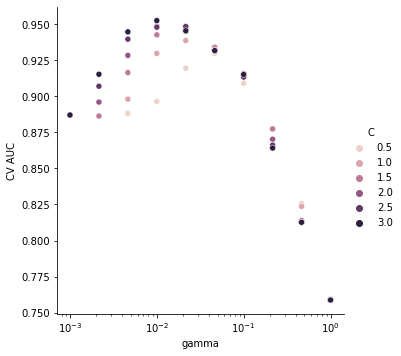

In [239]:
cv_res = pd.DataFrame({
  "C": np.array(search.cv_results_["param_model__C"]),
  "auc": search.cv_results_["mean_test_score"],
  "gamma": search.cv_results_["param_model__gamma"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "gamma",
  y = "auc",
  hue = "C"
  ).set(
    xscale = "log",
    xlabel = "gamma",
    ylabel = "CV AUC"
    );
plt.show()

In [240]:
search.best_score_

0.9524267195767196

In [241]:
search.best_params_

{'model__C': 3.0, 'model__gamma': 0.01}

In [242]:
roc_auc_score(
  y_test,
  search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.9648615130219098

In [243]:
accuracy_score(
  y_test,
  search.best_estimator_.predict(X_test)
  )

0.88

The final AUC on the test set is 0.96. The final classification accuracy on the test set is 0.88.

Among these three methods, SVM with radial kernel performs best (classification accuracy=0.88). Compared with those methods tried in HW4, the boosting method is the best (classification accuracy=0.89).

### 4 Bonus (10pts)

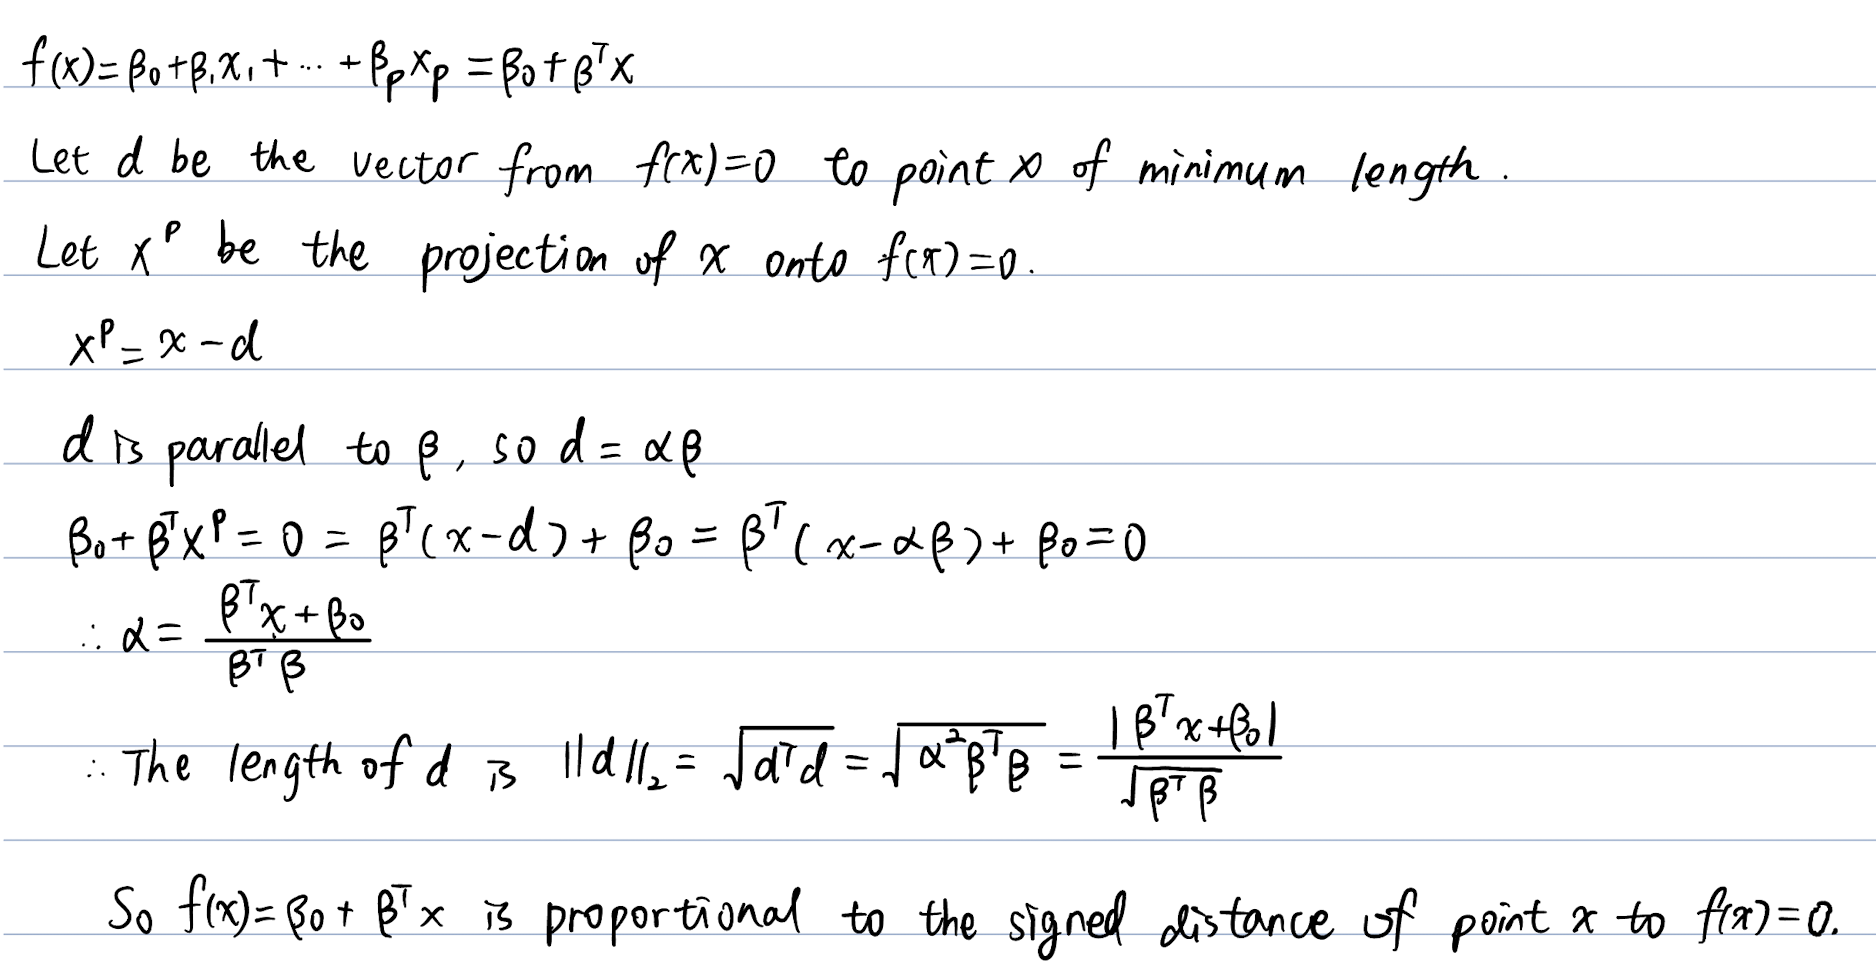